<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#US-Data" data-toc-modified-id="US-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>US Data</a></span></li><li><span><a href="#Load-data,-Fit-Model" data-toc-modified-id="Load-data,-Fit-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data, Fit Model</a></span></li><li><span><a href="#Fit-and-Predict" data-toc-modified-id="Fit-and-Predict-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fit and Predict</a></span></li><li><span><a href="#Display-Actual-vs-Prediction" data-toc-modified-id="Display-Actual-vs-Prediction-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Display Actual vs Prediction</a></span></li></ul></div>

## US Data

## Load data, Fit Model

In [1]:
import pandas as pd

# Get our Country model data
country = 'US'
filepath = '../data/raw/'

In [15]:
import sys
from os import path
sys.path.append(path.pardir)
from src.covid import CovidCountry

us = CovidCountry(country=country,
                  filepath=filepath)
us.load(607000)

## Fit and Predict

In [16]:
us.fit(curve='gamma')
us_df = us.predict()
us.save(filepath='../data/processed/')

In [17]:
# Show small window of prediction and actual
us_df[pd.Timestamp.now().date()-pd.Timedelta('3D'):].diff()[1:6]

,Actual,Prediction
Date,,
2020-04-12,28917.0,29050.256352
2020-04-13,25306.0,28032.355522
2020-04-14,26381.0,26885.863544
2020-04-15,NaN,25635.556060
2020-04-16,NaN,24305.827141


## Display Actual vs Prediction

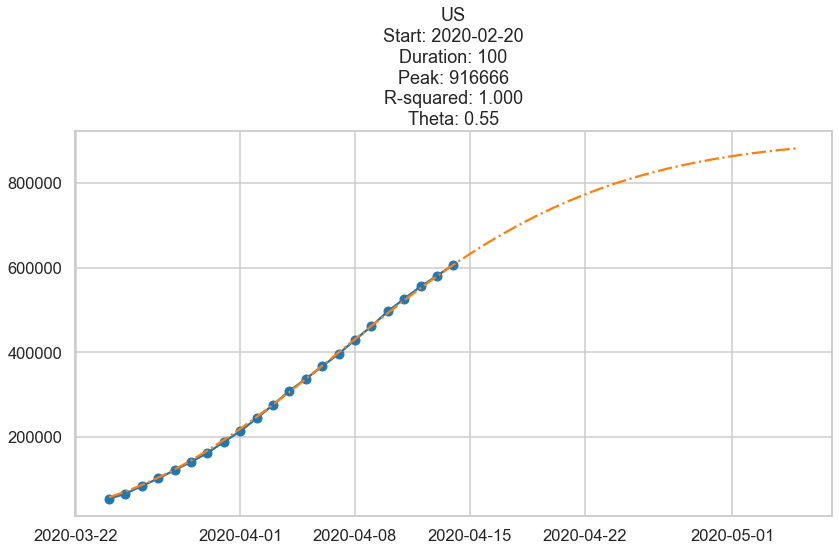

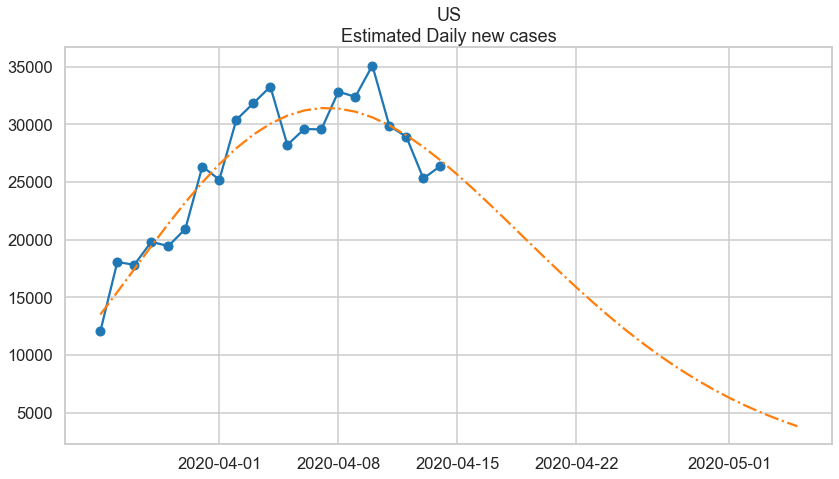

In [18]:
us.display(offset=21)